## Checkpoint 11

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DIR = os.path.join(os.getcwd(), 'GeantExample3')

In [2]:
# Read datafiles

layer1 = pd.read_csv(os.path.join(DIR, 'output_nt_Tracker1.csv'), comment='#', 
                     names=[ "EventID", "Phi", "Theta"])
layer2 = pd.read_csv(os.path.join(DIR, 'output_nt_Tracker2.csv'), comment='#', 
                     names=[ "EventID", "Phi", "Theta"])
truth = pd.read_csv(os.path.join(DIR, 'output_nt_Truth.csv'), comment='#', 
                     names=[ "EventID", "Phi", "Theta", "Momentum"])

In [3]:
# Sanity check
layer1, layer2, truth

(      EventID       Phi     Theta
 0           1 -2.447670  0.928358
 1           1  0.710358  2.213220
 2           2 -1.703770  2.212250
 3           2  1.454290  0.929340
 4           3  0.335390  2.182440
 ...       ...       ...       ...
 3719      998 -2.640350  1.805200
 3720      998 -2.640370  1.805160
 3721      998 -2.640370  1.805150
 3722      999  1.637980  1.771650
 3723      999 -1.410340  1.447290
 
 [3724 rows x 3 columns],
       EventID       Phi     Theta
 0           0 -2.066390  2.334350
 1           1 -2.455900  0.928325
 2           1  0.718557  2.213250
 3           1  0.718558  2.213250
 4           1  0.718534  2.213250
 ...       ...       ...       ...
 3233      997 -0.875075  2.025630
 3234      998  0.443603  1.352440
 3235      998 -2.647820  1.805460
 3236      999  1.627990  1.771620
 3237      999 -1.403640  1.447270
 
 [3238 rows x 3 columns],
       EventID       Phi     Theta  Momentum
 0           0 -0.063847  2.422340   45.2024
 1           0

#### Q. Using the event ID, print the number of true particles, layer one hits, and layer two hits in each event. [1 mark]

In [4]:
# Sanity check
len(layer1), len(layer2)

(3724, 3238)

The below array show the number of particles detected on Layer 1 and Layer 2. The count_truth array shows the number of particles that were ejected for that event.

In [5]:
count_layer1 = np.bincount(layer1['EventID'])
count_layer2 = np.bincount(layer2['EventID'])
count_truth = np.bincount(truth['EventID'])

count_layer1, count_layer2

(array([  0,   2,   2,   2,  34,   2,  20,   0,   0,   0,   0,   0,   0,
         13,   2,   0,   0,   2,   2,   0,   2,   0,   0,   2,   2,   2,
          1,   2,   0,   0,   2,   0,   2,   6,   2,   2,   0,   2,   2,
          0,   2,   2,   2,   0,   2,   2,   0,   2,   2,  10,   0,   2,
          2,   2,   2,   2,   2,   0,   3,   6,   0,   2,   3,   0,   2,
          2,   0,   2,   0,   0,   0,   3,   2,   0,   0,   2,   0,   0,
          2,   0,   2,   2,   2,   8,   0,   2,   2,   0,   2,   2,   0,
          2,   0,   0,   0,   0,   0,   0,   2,   2,   2,   2,   2,   0,
          2,   0,   2,   2,   0,  15,   2,   2,   2,   0,   0,   2,   2,
          2,   2,   2,   0,  17,   2,   0,   0,   0,   5,   0,  37,   2,
          2,   2,   2,   2,   0,  15,   2,   0,   2,   2,   2,   0,   2,
          2,   3,   2,   0,  39,   2,   0,   2,   0,   2,   2,   0,   0,
          0,   0,   2,   0,   0,   0,   2,   0,   0,   2,   2,   2,   0,
          0,   0,   2,   2,   3,   2,   0,   0,   2

In [6]:
count_truth

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

#### Q. For each event, find all pairs of hits between layer 1 and layer 2. [1 mark]

In [7]:
# For each event, calculate the closet angle between the two layers
pairs_count = np.zeros(np.unique(truth['EventID']).shape)

for i in np.unique(truth['EventID']):
    layer1_event = layer1[layer1['EventID'] == i]
    layer2_event = layer2[layer2['EventID'] == i]

    for part1 in layer1_event['Theta']:
        for part2 in layer2_event['Theta']:
            if (math.fabs(part1 - part2) < 0.0001):
                pairs_count[i] += 1

In [8]:
res = {
    "EventID": np.unique(truth['EventID']),
    "PairsCount": pairs_count,
    "TruthCount": count_truth,
}

res = pd.DataFrame(res)
res

,EventID,PairsCount,TruthCount
0,0,0.0,2
1,1,7.0,2
2,2,2.0,2
3,3,6.0,2
4,4,4.0,2
...,...,...,...
995,995,10.0,2
996,996,0.0,2
997,997,2.0,2
998,998,7.0,2


In [9]:
print("The number of pairs found in each event:\n", np.array(res["PairsCount"]))

The number of pairs found in each event:
 [  0.   7.   2.   6.   4.   2.  11.   0.   0.   0.   0.   0.   0.   2.
   2.   0.   0.   2.   2.   0.   2.   0.   0.   2.   2.   1.   1.   2.
   0.   0.   2.   0.   8.   6.   7.   2.   0.   5.   2.   0.   2.   2.
   2.   0.   2.   2.   0.   2.   8.  10.   0.   2.  13.   2.   2.   2.
   2.   0.   2.   6.   0.   2.   2.   0.   5.   2.   0.   2.   0.   0.
   0.   2.   8.   0.   0.   2.   0.   0.   2.   0.   2.   2.  11.  40.
   0.   2.   9.   0.   2.   2.   0.   2.   0.   0.   0.   0.   0.   0.
   4.   2.   7.   2.   2.   0.   2.   0.   2.   2.   0.   2.   2.   6.
   2.   0.   0.   2.   2.  12.   2.   2.   0.  17.   6.   0.   0.   0.
   5.   0.  13.   2.   2.   2.   2.   2.   0.  12.  10.   0.   2.   2.
   5.   0.   2.   2.   2.   2.   0.  15.  10.   0.   2.   0.   2.   2.
   0.   0.   0.   0.   1.   0.   0.   0.   2.   0.   0.   6.   2.   2.
   0.   0.   0.   2.   9.   5.   2.   0.   0.   2.   1.   2.   2.   0.
   2.   9.   1.   2.   2.   0.   2.

In [11]:
print("Total number of pairs found:", np.sum(np.array(res["PairsCount"])))

Total number of pairs found: 2692.0


#### Q. For each pair of tracker hits, assume they come from a single particle and calcuate its momentum. [1 mark]

In [14]:
B = 0.5
layer1_R = 4.0
layer2_R = 8.0

pairs = []
pairs_event = []

for i in np.unique(truth['EventID']): # 1-1000
    pairs.append([])

    layer1_event = layer1[layer1['EventID'] == i]
    layer2_event = layer2[layer2['EventID'] == i]

    for part1 in range(len(layer1_event)):
        for part2 in range(len(layer2_event)):
            if (math.fabs(layer1_event.iloc[part1]['Theta'] - layer2_event.iloc[part2]['Theta']) < 0.0001):
                delta_phi = math.fabs(layer1_event.iloc[part1]['Phi'] - layer2_event.iloc[part2]['Phi'])
                sagitta = math.sin(delta_phi) * layer1_R
                bendR = (layer2_R**2/(8.0*sagitta))

                pt = 0.3*B*bendR
                p = pt/math.sin(layer1_event.iloc[part1]['Theta'])

                pairs[i].append([p, layer1_event.iloc[part1]['Theta']])

In [16]:
# Arranged as [p, theta] for each pair in each event
pairs

[[],
 [[45.52925541920648, 0.928358],
  [45.700894182409385, 2.21322],
  [45.695321027524365, 2.21322],
  [45.82945301872997, 2.21322],
  [45.924940622494724, 2.21322],
  [45.936200625358076, 2.21322],
  [45.90806096504488, 2.21322]],
 [[45.49575364326456, 2.21225], [45.22111666867599, 0.92934]],
 [[45.4466312586516, 2.18244],
  [45.464077552062996, 0.959136],
  [45.464077552062996, 0.959136],
  [45.57716982635457, 0.959136],
  [45.74786716565903, 0.959136],
  [45.919847957378764, 0.959136]],
 [[45.44832656037189, 2.04377],
  [45.474634143816324, 1.09801],
  [45.474634143816324, 1.09801],
  [46.28642970803186, 1.09802]],
 [[45.26987166184898, 1.99455], [45.70983622380233, 1.14705]],
 [[45.73808113119474, 1.62832],
  [45.73808113119474, 1.62832],
  [45.46122548028908, 1.62829],
  [45.187674495845286, 1.62825],
  [45.406644925304875, 1.51316],
  [45.38607130415942, 1.51316],
  [45.731417603051156, 1.51316],
  [46.03264657776883, 1.51316],
  [46.245167326559134, 1.51316],
  [46.4166020536

#### Q. Find the momentum resolution of our experiment. Plot a 1D histogram to show the distribution for all reconstructed particles. [1 mark]

In [17]:
resolved_p = []
p = []

for i in np.unique(truth['EventID']): # 1-1000
    resolved_p.append([])
    p.append([])
    truth_event = truth[truth['EventID'] == i]

    for part in range(len(truth_event)):
        true_theta = truth_event.iloc[part]['Theta']
        true_mom = truth_event.iloc[part]['Momentum']

        for j in pairs[i]:
            theta = j[1]
            mom = j[0]

            if (math.fabs(theta - true_theta) < 0.0001):
                p[i].append([part, mom])
                
                resolved_p[i].append([part, (mom - true_mom)/true_mom])


In [18]:
# flatten resolved_p for momentums only
# FOR PLOTTING PURPOSES
resolved_p_flat = []
for i in range(len(resolved_p)):
    for j in range(len(resolved_p[i])):
        resolved_p_flat.append(resolved_p[i][j][1])

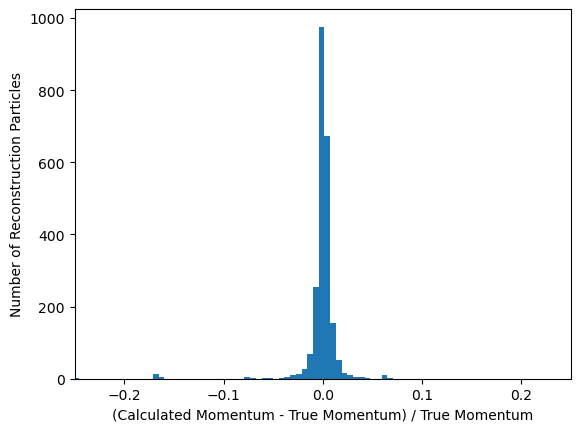

In [19]:
plt.hist(resolved_p_flat, bins=500)
plt.xlabel('(Calculated Momentum - True Momentum) / True Momentum')
plt.ylabel('Number of Reconstruction Particles')
plt.xlim(-0.25, 0.25)
plt.show()

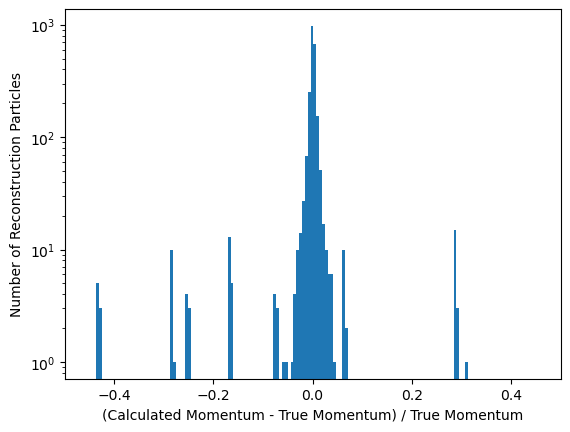

In [20]:
plt.hist(resolved_p_flat, bins=500)
plt.xlabel('(Calculated Momentum - True Momentum) / True Momentum')
plt.ylabel('Number of Reconstruction Particles')
plt.yscale('log')
plt.xlim(-0.5, 0.5)
plt.show()

#### Q. Plot the total mass distribution. What was the original particle? Compare your results to the PDG values for mass and width. [1 mark]

In [21]:
# Calculate the momentum resolution for each event

sim_part_mom = []
for event in np.unique(truth['EventID']):
    sim_part_mom.append([])
    truth_event_mom = truth[truth['EventID'] == event]['Momentum']

    for part in range(len(truth_event)):
        event_part_mom = []

        for pair in p[event]:
            if pair[0] == part:
                event_part_mom.append(pair[1])
        
        if len(event_part_mom) > 0:
            # find the value closest to the true momentum and append it to the list
            sim_part_mom[event].append(min(event_part_mom, key=lambda x:abs(x-truth_event_mom.iloc[part])))

In [22]:
# Sanity check
sim_part_mom

[[],
 [45.695321027524365, 45.52925541920648],
 [45.22111666867599, 45.49575364326456],
 [45.464077552062996, 45.4466312586516],
 [45.474634143816324, 45.44832656037189],
 [45.70983622380233, 45.26987166184898],
 [45.38607130415942, 45.46122548028908],
 [],
 [],
 [],
 [],
 [],
 [],
 [45.05673160978322, 45.04761276362205],
 [45.30201708055658, 45.566667147631726],
 [],
 [],
 [45.7673609237966, 45.70028855246378],
 [45.58051831586872, 45.3229557253016],
 [],
 [45.33926759804277, 45.465015513699264],
 [],
 [],
 [45.17493865561031, 45.465739626131096],
 [45.77051742112317, 45.566814188923786],
 [45.52102441461092],
 [42.621629227405116],
 [45.4666926615411, 45.374038541664724],
 [],
 [],
 [45.58419843829865, 45.409002309730326],
 [],
 [45.407664315763334, 45.40762382112769],
 [21.58416435473836, 45.3473191547275],
 [45.06474178856843, 45.53204575459906],
 [45.16476834584438, 45.59468814797549],
 [],
 [45.43982901472748, 45.500031158631145],
 [45.63298476050716, 45.56404113611062],
 [],
 [4

In [26]:
# Select only the events with both particles matched to momenta
# Calculate the energy of the particles by summing the momenta

energy = []
for i in sim_part_mom:
    if len(i) == 2:
        energy.append(np.sum(i))

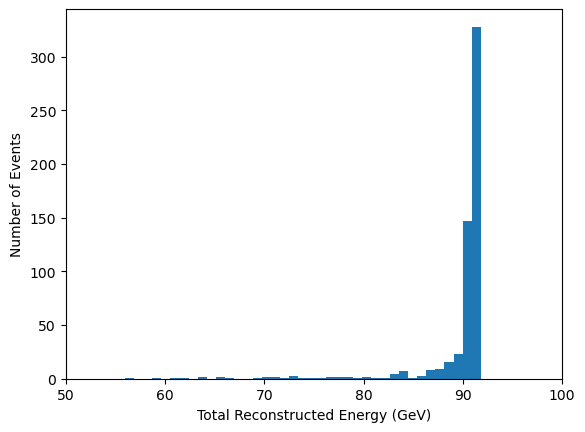

In [27]:
plt.hist(energy, bins=100)
plt.xlabel('Total Reconstructed Energy (GeV)')
plt.ylabel('Number of Events')
plt.xlim(50, 100)
plt.show()

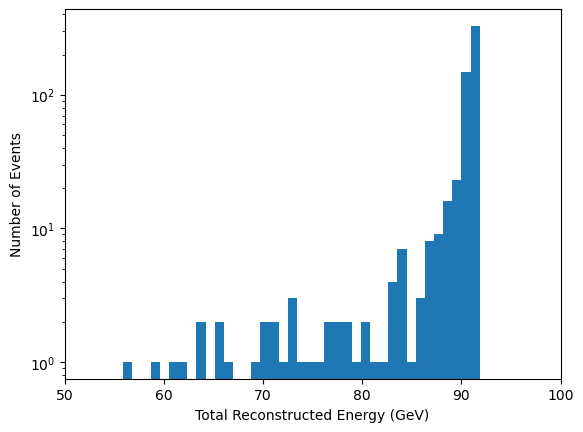

In [28]:
plt.hist(energy, bins=100)
plt.xlabel('Total Reconstructed Energy (GeV)')
plt.ylabel('Number of Events')
plt.yscale('log')
plt.xlim(50, 100)
plt.show()